In [17]:
import pandas
from os import listdir, getcwd
from os.path import isfile, join

In [18]:
path = getcwd()
files = [f for f in listdir(path) if isfile(join(path, f)) and '.csv' in f]
files

['MLCT_B_20D_00A_S10006_0.0075.csv',
 'ar500p_E3_S1_003_0.072.csv',
 'a200pr20nE8S20005_Apr_0.118.csv',
 'a200pr20nE1S20003_Apr_0.118.csv',
 'ar20005_0.0248.csv',
 'iD4_S1_0VacBD0004_Apr_0.089.csv']

In [20]:
data_list = {}
for f in files:
    data_list[f] = pandas.read_csv(f)

In [21]:
for f in files:
    print(data_list[f].columns)

Index(['ZIndex', ' No', 'zSensr', 'defl'], dtype='object')
Index(['No', 'defl', 'zSensr'], dtype='object')
Index(['No', 'zSensr', 'defl'], dtype='object')
Index(['No', 'zSensr', 'defl'], dtype='object')
Index(['No', 'defl', 'zSensr'], dtype='object')
Index(['No', 'defl', 'zSensr'], dtype='object')


In [22]:
data_list[files[0]] = data_list[files[0]].drop([' No'], axis=1)

In [23]:
data_list[files[0]] = data_list[files[0]].rename(columns={'ZIndex':'No'})
for f in files:
    data_list[f] = data_list[f].reindex(columns=['No','zSensr','defl'])

In [24]:
approach_curve = []
approach_constants = []
full_curve = []
full_constants = []
for k in data_list:
    if 'Apr' in k:
        approach_curve.append(data_list[k])
        approach_constants.append(float(k[-9:-4]))
    else:
        full_curve.append(data_list[k])
        full_constants.append(float(k[-9:-4]))
for i in range(len(approach_curve)):
    approach_curve[i].defl *= approach_constants[i]

In [25]:
import matplotlib.pyplot as plt
import matplotlib

**Approach Curve 0**

Text(0, 0.5, 'Z position')

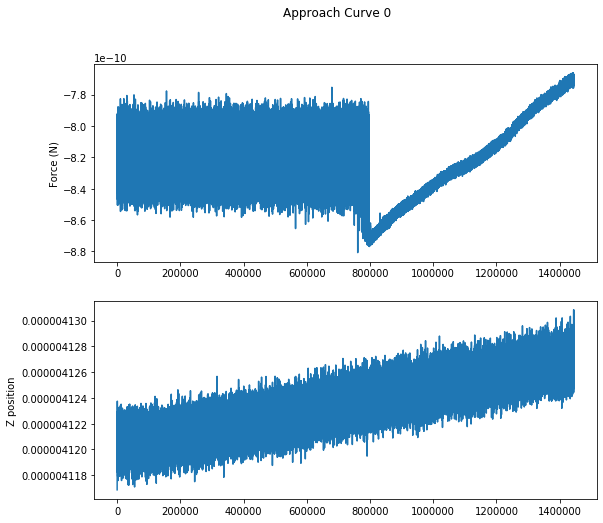

In [26]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
n = 0
d = approach_curve[n].defl * approach_constants[n]
z = approach_curve[n].zSensr
t = approach_curve[n].No

plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.plot(t, d)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z)
plt.ylabel('Z position')

Text(0, 0.5, 'Z position')

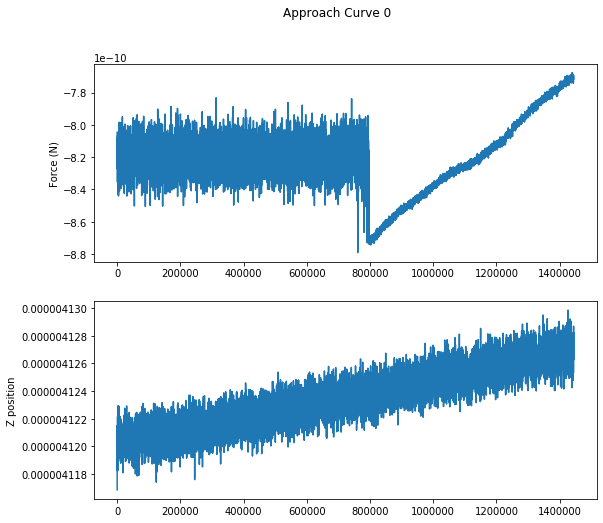

In [40]:
n = 0
resample = approach_curve[n].iloc[::100]
d = resample.defl * approach_constants[n]
z = resample.zSensr
t = resample.No

plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.plot(t, d)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z)
plt.ylabel('Z position')

In [41]:
resample.shape

(14446, 3)

In [42]:
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS
import numpy as np

In [43]:
X = pandas.concat([d,z], axis=1).values
scaler = StandardScaler()  
scaler.fit_transform(X)  

array([[ 0.75593026, -3.10292462],
       [ 0.32364684, -1.29340998],
       [ 0.21104262, -1.66705419],
       ...,
       [ 2.40108644,  1.68557079],
       [ 2.43633571,  1.27377798],
       [ 2.36373177,  2.16306393]])

In [60]:
opt = OPTICS(min_samples=1445)
labels = opt.fit_predict(X)

In [70]:
labels.reshape

(14446,)

In [62]:
plt.figure(figsize=(9, 8))
plt.suptitle('OPTICS Clustering of Approach Curve ' + str(n))
plt.subplot(211)
plt.scatter(t, d, c=labels)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z, c=labels)
plt.ylabel('Z position')

Text(0, 0.5, 'Z position')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdb96107048> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 648x576 with 2 Axes>

In [45]:
dbs = DBSCAN()
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [72]:
dbs.labels_.shape

(14446,)

In [67]:
plt.figure(figsize=(9, 8))
plt.suptitle('DBSCAN Clustering of Approach Curve ' + str(n))
plt.subplot(211)
plt.scatter(t, d, c=dbs.labels_)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z, c=dbs.labels_)
plt.ylabel('Z position')

Text(0, 0.5, 'Z position')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdb96107048> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 648x576 with 2 Axes>

In [52]:
neigh = NearestNeighbors(n_neighbors=3000)
nbrs = neigh.fit(X)
distances,indices = nbrs.kneighbors(X)

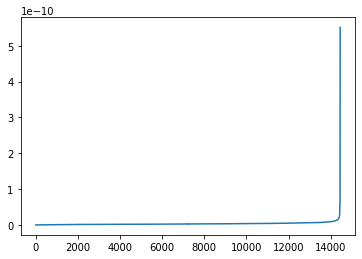

In [53]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

**Approach Curve 1**

Text(0,0.5,'Z position')

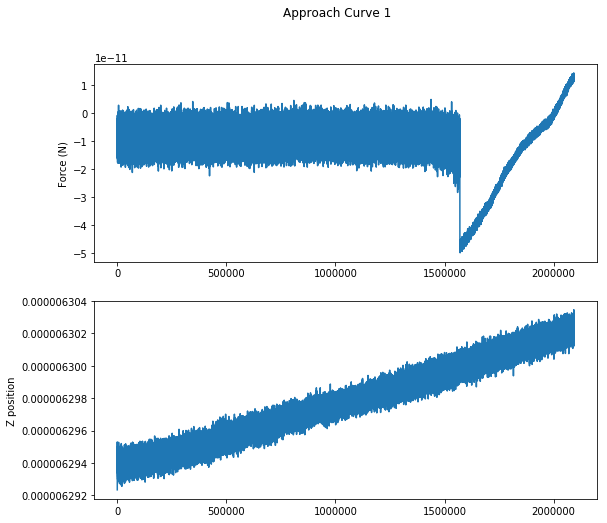

In [11]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
n = 1
d = approach_curve[n].defl * approach_constants[n]
z = approach_curve[n].zSensr
t = approach_curve[n].No

plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.plot(t, d)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z)
plt.ylabel('Z position')

In [ ]:
X = pandas.concat([d,z], axis=1).values
scaler = StandardScaler()  
scaler.fit_transform(X)  

In [ ]:
db = DBSCAN()
db.fit(X)

In [ ]:
plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.scatter(t, d, c=db.labels_)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z, c=db.labels_)
plt.ylabel('Z position')

In [ ]:
neigh = NearestNeighbors(n_neighbors=50000)
nbrs = neigh.fit(X)
distances = nbrs.kneighbors(X)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

**Approach Curve 2**

Text(0,0.5,'Z position')

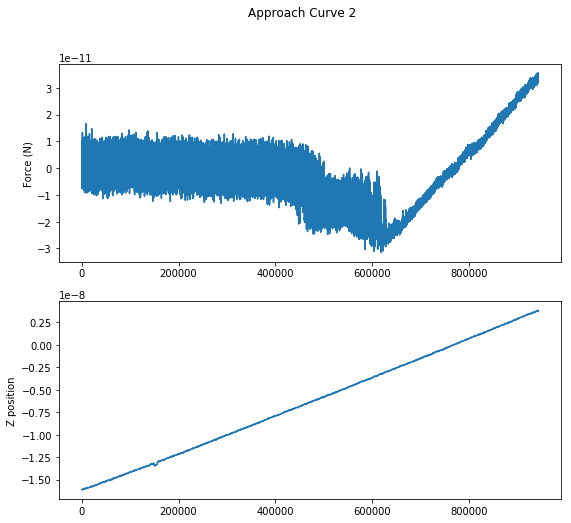

In [13]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
n = 2
d = approach_curve[n].defl * approach_constants[n]
z = approach_curve[n].zSensr
t = approach_curve[n].No

plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.plot(t, d)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z)
plt.ylabel('Z position')

In [7]:
X = pandas.concat([d,z], axis=1).values
scaler = StandardScaler()  
scaler.fit_transform(X)  

array([[ 0.55839449,  1.73205252],
       [ 0.47466945,  1.73205252],
       [ 0.56564211,  1.73205252],
       ...,
       [ 1.24446561, -1.73204519],
       [ 1.29970783, -1.73204519],
       [ 1.30774855, -1.73205256]])

In [ ]:
db = DBSCAN()
db.fit(X)

In [ ]:
plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.scatter(t, d, c=db.labels_)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z, c=db.labels_)
plt.ylabel('Z position')

In [ ]:
neigh = NearestNeighbors(n_neighbors=50000)
nbrs = neigh.fit(X)
distances = nbrs.kneighbors(X)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)